In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
train_path =r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\Dataset\train'
test_path = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\Dataset\test'

In [10]:
import glob
c=0
for i in glob.glob(train_path+'/*/*'):
    
    #print(i)
    c+=1
print(f'train_data len :{c}')
c=0
for i in glob.glob(test_path+'/*/*'):
    #print(i)
    c+=1
print(f'test_data len :{c}')

train_data len :1291
test_data len :194


In [11]:
import os
pp = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\Dataset\train\without_mask'
ll = []
for i in os.listdir(pp):
    #print(i)
    f = i.split('.')[-1]
    ll.append(f)
print(set(ll))
# for i in os.listdir(pp):
#     f = i.split('.')[-1]
#     if f == '.JPG':
#         f = i.split('.')[0]
#         f_path = os.path.join(pp+f+'.jpg')
#         print(pp+i)
#         print(f_path)
#         os.rename(pp+i, f_path)

{'jpg'}


In [12]:
from pathlib import Path
import imghdr

data_dir = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\Dataset\train\without_mask'
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

In [3]:
import glob
dir = glob.glob(train_path+'/*')
labels = [dir[0].split('\\')[-1], dir[1].split('\\')[-1]]
print(labels)

['without_mask', 'with_mask']


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:

# data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=20,
#     brightness_range=(0.2, 0.8),
#     zoom_range=0.3,
#     horizontal_flip=True,
#     vertical_flip=True
# )

In [16]:
# train_generator = data_gen.flow_from_directory(train_path,
#                                        subset='training',
#                                        batch_size=32,
#                                        target_size = (150,150),
#                                        shuffle=True,
#                                         class_mode='categorical')

In [17]:
# labels = ['without_mask', 'with_mask']

# x,y = train_generator.next()
# #print(x,y)
# fig = plt.figure(figsize=(8,8))

# # create loop in range 9 or your choice
# for i in range(10):
#   # add a subplot to figure of size you want
#     fig.add_subplot(4 ,3, i+1)
#   # create a image named variable to store ith value of x
#     image = x[i]
#   # create a label named variable to store ith value of y 
#     label = y[i][0]
#     #print(label)
#   # plot the image using imshow
#     plt.imshow(image)
#   # add the title as actual label to image
#     plt.title(labels[int(label)])
#     plt.axis('off')
# #show the image
# plt.show()

In [18]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset='training'
)
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    validation_split=0.15,
    subset='validation',
     seed=42
)

Found 1291 files belonging to 2 classes.
Using 1098 files for training.
Found 1291 files belonging to 2 classes.
Using 193 files for validation.


In [19]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    label_mode='binary',
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
     seed=42
)

Found 194 files belonging to 2 classes.


In [22]:
print(train_ds.class_names)
type(train_ds)

['with_mask', 'without_mask']


tensorflow.python.data.ops.batch_op._BatchDataset

In [28]:
class_names = train_ds.class_names
class_names

['with_mask', 'without_mask']

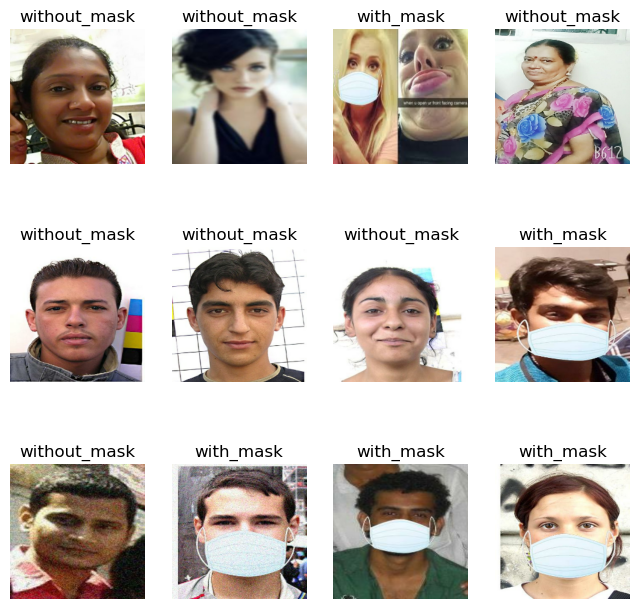

In [14]:

plt.figure(figsize=(8, 8))
class_names = train_ds.class_names
for images, labels in train_ds.take(1):
    
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        # create a image named variable to store ith value of image astype np.uint8
        plt.imshow(images[i].numpy().astype("uint8"))
        # create a label named variable to store ith value of label astype np.uint8
        plt.title(class_names[labels[i].numpy().astype("uint8")[0]])
        plt.axis("off")

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

In [16]:
from keras.applications.vgg16 import VGG16
VGG16_model = Sequential()
model = VGG16(include_top=False,
              input_shape=(224,224,3),
              classes=2,
              pooling='avg',
              weights='imagenet')


In [17]:
for layer in model.layers:
    layer.trainable = False
VGG16_model.add(model)

In [18]:
VGG16_model.add(Flatten())
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(Dense(256, activation='relu'))
VGG16_model.add(Dense(32, activation='relu'))
VGG16_model.add(Dense(2, activation='softmax'))
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 15,116,962
Trainable params: 402,274
Non-t

In [19]:
VGG16_model.compile(loss='SparseCategoricalCrossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
molde_path = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\best_model.hdf5'
check_point = ModelCheckpoint(filepath=molde_path,
                             monitor='val_loss',
                             save_best_only=False,
                             mode='min',
                             #period = 1,
                             save_freq='epoch')

In [21]:
batch_size = 32
hist = VGG16_model.fit(train_ds,
                      batch_size=batch_size,
                      epochs = 5,
                      validation_data = validation_ds,
                      callbacks = [check_point])

Epoch 1/5
35/35 [==============================] - 323s 9s/step - loss: 0.6686 - accuracy: 0.8725 - val_loss: 0.0205 - val_accuracy: 0.9948
Epoch 2/5
35/35 [==============================] - 306s 9s/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 3/5
35/35 [==============================] - 305s 9s/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.0232 - val_accuracy: 0.9896
Epoch 4/5
35/35 [==============================] - 307s 9s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 0.9896
Epoch 5/5
35/35 [==============================] - 297s 9s/step - loss: 4.6622e-04 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9845


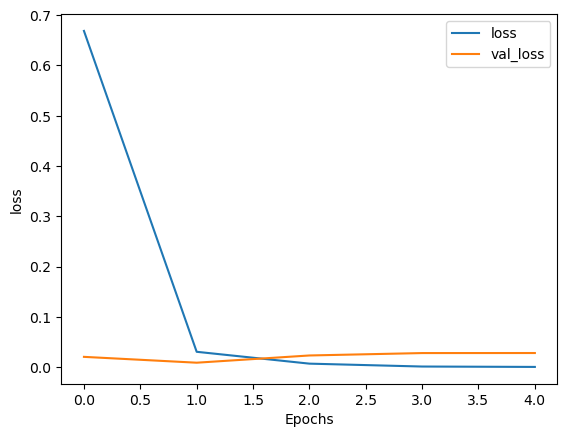

In [23]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

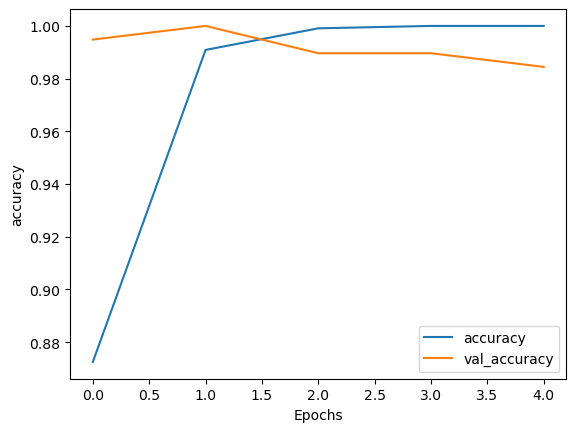

In [33]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
#plt.axis(ymin = 0.5, ymax=1.0)
plt.legend()
plt.show()

In [31]:
test = glob.glob(test_path+'/with_mask/*')

(525, 350)
(224, 224)
(1, 224, 224, 3)


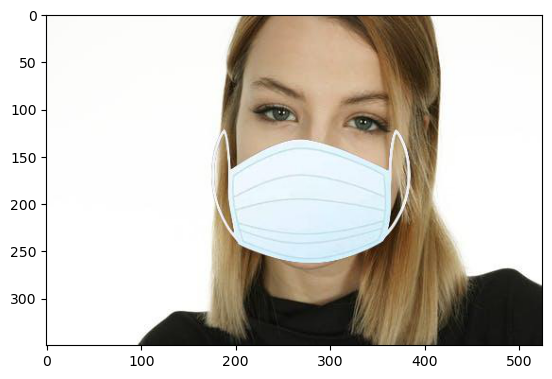

In [32]:
from PIL import Image
img = Image.open(test[0])
plt.imshow(img)
print(img.size)
img = img.resize((224,224))
print(img.size)
img = np.expand_dims(img, axis=0)
print(img.shape)

In [33]:
pred_image = VGG16_model.predict(img)

NameError: name 'VGG16_model' is not defined

In [34]:
output = class_names[np.argmax(pred_image)]
output

'without_mask'

In [23]:
from tensorflow import keras
model_path = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\best_model.hdf5'
model = keras.models.load_model(model_path)

In [24]:
score = model.evaluate(test_ds, verbose=0)
print(f'Test loss:{score[0]}')
print(f'Test accuracy:{score[1]}')
print(model.metrics_names)

Test loss:0.08833081275224686
Test accuracy:0.9896907210350037
['loss', 'accuracy']


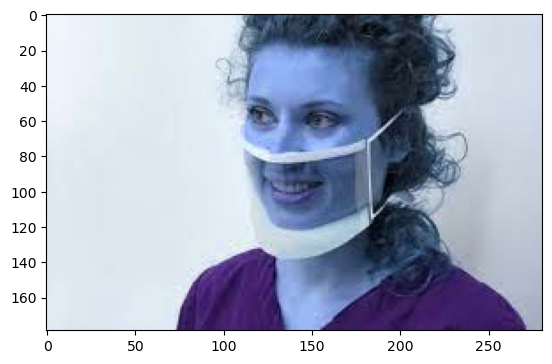

In [8]:
import cv2
import matplotlib.pyplot as plt
rand_image = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\test_with_mask1.jpg'
image = cv2.imread(rand_image)
plt.imshow(image)

(281, 179)
(224, 224, 3)
(224, 224, 3)
(1, 224, 224, 3)


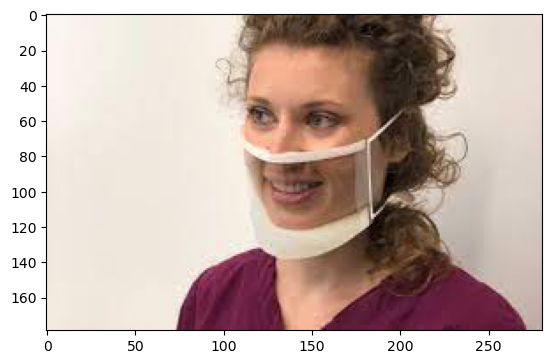

In [9]:
image = tf.keras.utils.load_img(rand_image)
plt.imshow(image)
print(image.size)
image_resize = tf.image.resize(image, [224, 224])
print(image_resize.shape)
image_arr = tf.keras.utils.img_to_array(image_resize)
print(image_arr.shape)
input_arr = np.array([image_arr])
print(input_arr.shape)

In [11]:
class_names = ['with_mask', 'without_mask']

pred_image = model.predict(input_arr)
output = class_names[np.argmax(pred_image)]
output

1/1 [==============================] - 0s 281ms/step


'with_mask'

In [5]:
import cv2
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import load_model

model_path = r'C:\Users\Siva Reddy\Desktop\projects\face_mask_detection-master\face_mask_detection-master\best_model.hdf5'
model = keras.models.load_model(model_path)

In [6]:

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,0,255),1:(0,255,0)}

size = 8
webcam = cv2.VideoCapture(0) #Use camera 0

# We load the xml file
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    (rval, im) = webcam.read()
    im=cv2.flip(im,1,1) #Flip to act as a mirror
    print(im.shape[1])
    # Resize the image to speed up detection
    mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    # detect MultiScale / faces 
    faces = classifier.detectMultiScale(mini)

    # Draw rectangles around each face
    for f in faces:
        (x, y, w, h) = [v * size for v in f] #Scale the shapesize backup
        #Save just the rectangle faces in SubRecFaces
        face_img = im[y:y+h, x:x+w]
        resized=cv2.resize(face_img,(224,224))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,224,224,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)
        #print(result)
        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(im, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    # Show the image
    cv2.imshow('LIVE',   im)
    key = cv2.waitKey(10)
    # if Esc key is press then break out of the loop 
    if key == 27: #The Esc key
        break
# Stop video
webcam.release()

# Close all started windows
cv2.destroyAllWindows()

640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
1/1 [==============================] - 3s 3s/step
640
1/1 [==============================] - 0s 332ms/step
640
1/1 [==============================] - 0s 316ms/step
640
1/1 [==============================] - 0s 338ms/step

640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
1/1 [==============================] - 0s 297ms/step
640
1/1 [==============================] - 0s 285ms/step
640
1/1 [==============================] - 0s 307ms/step
640
1/1 [==============================] - 0s 299ms/step
640
1/1 [==============================] - 0s 332ms/step
640
640
1/1 [==============================] - 0s 300ms/step
640
640
640
640
1/1 [==============================] - 0s 301ms/step
640
640
640
640
1/1 [==============================] - 0s 295ms/step
640
640
640
640
640
640
640
640
640
640
640
640
640
1/1 [==============================] - 0s 286ms/step
640
1/1 [==============================] - 0s 288ms/step
640
1/1 [==============================] - 0s 297ms/step
640
1/1 [==============================] - 0s 280ms/step
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
640
